In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [14]:
df = pd.read_parquet('/content/rent_mortgage_all_features.parquet')
df

,RegionID,RegionName,StateName,Date,HomeValue,IncomeNeeded,Inventory,DaysToPending,RentValue,RenterIncomeNeeded,...,cpi_lag1,cpi_roll3,mortgage_rate_lag1,mortgage_rate_roll3,unrate_lag1,unrate_roll3,MortgageValue,Rent_to_Mortgage_Ratio,MortgageValue_Change,Sales_to_Inventory
0,394304,"Akron, OH",OH,2018-05-01,141498.445820,37039.911190,3632.0,58.0,842.862503,33714.500133,...,0.000,0.000000,0.0000,0.000000,0.0,0.000000,578.230936,1.457657,NaN,0.294879
1,394304,"Akron, OH",OH,2018-06-01,141997.352756,37126.302161,3806.0,55.0,844.909823,33796.392940,...,250.792,0.000000,4.5860,0.000000,3.8,0.000000,579.186971,1.458786,0.001653,0.254073
2,394304,"Akron, OH",OH,2018-07-01,142509.730768,37144.015612,3917.0,54.0,844.722835,33788.913391,...,251.018,251.008000,4.5700,4.561167,4.0,3.866667,578.395359,1.460459,-0.001367,0.266786
3,394304,"Akron, OH",OH,2018-08-01,143107.271515,37358.420177,3968.0,53.0,846.884637,33875.385472,...,251.214,251.298333,4.5275,4.549167,3.8,3.866667,582.351584,1.454250,0.006840,0.257812
4,394304,"Akron, OH",OH,2018-09-01,143845.022393,37757.841397,3918.0,56.0,850.004092,34000.163688,...,251.663,251.686333,4.5500,4.568333,3.8,3.766667,590.669795,1.439051,0.014284,0.204952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7999,395238,"Worcester, MA",MA,2025-03-01,471121.892980,128746.065420,1315.0,33.0,2118.639336,84745.573448,...,319.775,319.492000,6.8425,6.816833,4.1,4.100000,2406.662822,0.880322,-0.018957,0.461597
8000,395238,"Worcester, MA",MA,2025-04-01,471093.632963,129493.319360,1495.0,26.0,2125.944172,85037.766887,...,319.615,319.903667,6.6500,6.739167,4.2,4.166667,2425.157969,0.876621,0.007685,0.496321
8001,395238,"Worcester, MA",MA,2025-05-01,470533.524469,130264.921899,1799.0,21.0,2130.885088,85235.403528,...,320.321,320.172000,6.7250,6.730333,4.2,4.200000,2444.942673,0.871548,0.008158,0.501946
8002,395238,"Worcester, MA",MA,2025-06-01,469919.352005,130117.860196,2037.0,20.0,2140.907753,85636.310100,...,320.580,320.800333,6.8160,6.786167,4.2,4.166667,2442.125250,0.876658,-0.001152,0.534610


In [15]:
df.columns

Index(['RegionID', 'RegionName', 'StateName', 'Date', 'HomeValue',
       'IncomeNeeded', 'Inventory', 'DaysToPending', 'RentValue',
       'RenterIncomeNeeded', 'MarketHeatIndex', 'SalesCount',
       'NewConstruction', 'HomeValue_lag1', 'Inventory_lag1', 'RentValue_lag1',
       'MarketHeatIndex_lag1', 'HomeValue_roll3', 'Inventory_roll3',
       'RentValue_roll3', 'MarketHeatIndex_roll3', 'cpi', 'unrate',
       'mortgage_rate', 'Month', 'Month_Sin', 'Month_Cos',
       'HomeValue_to_Income', 'MortgageBurden', 'Inventory_to_Sales',
       'HomeValue_Change', 'IncomeNeeded_Change', 'CPI_Change',
       'MortgageRate_Change', 'Unemployment_Change', 'cpi_lag1', 'cpi_roll3',
       'mortgage_rate_lag1', 'mortgage_rate_roll3', 'unrate_lag1',
       'unrate_roll3', 'MortgageValue', 'Rent_to_Mortgage_Ratio',
       'MortgageValue_Change', 'Sales_to_Inventory'],
      dtype='object')

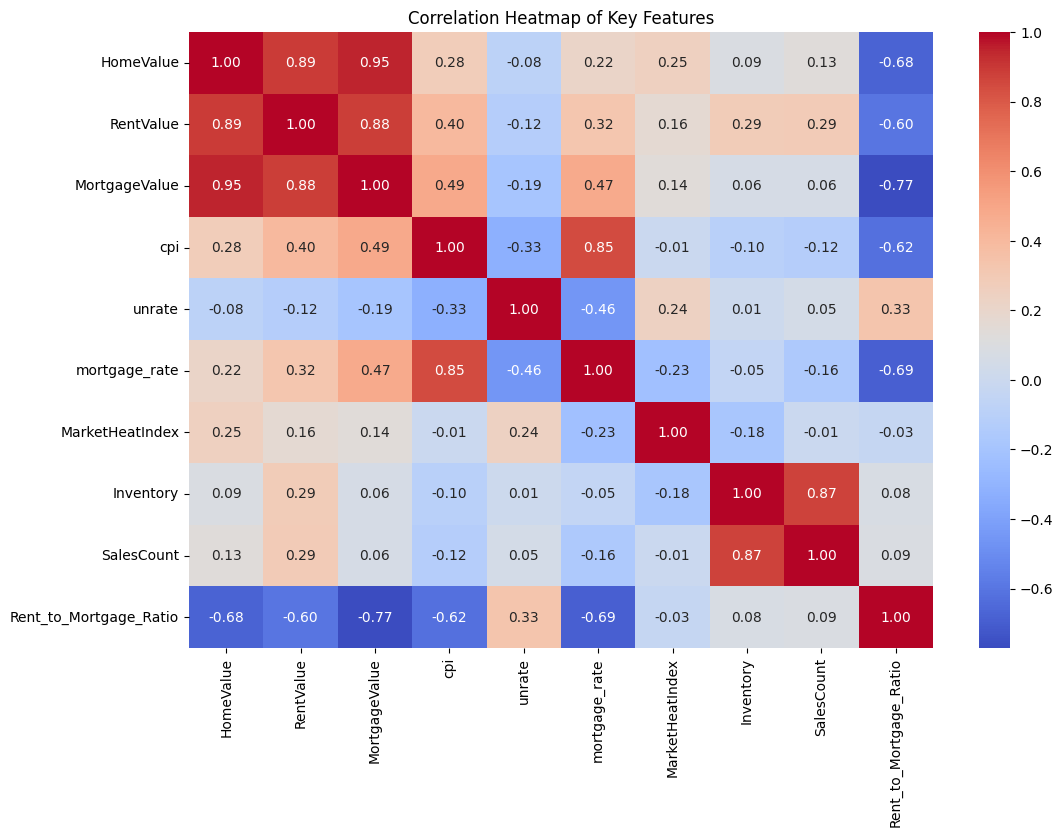

In [16]:
numeric_cols = ['HomeValue','RentValue','MortgageValue','cpi','unrate','mortgage_rate',
                'MarketHeatIndex','Inventory','SalesCount','Rent_to_Mortgage_Ratio']
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Key Features")
plt.show()

In [17]:
forecast = pd.read_csv('/content/forecasted_rent_mortgage.csv')
forecast

,RegionID,RegionName,StateName,Date,ForecastedRentValue,ForecastedMortgageValue
0,394304,"Akron, OH",OH,2018-05-31,841.759436,579.064519
1,394304,"Akron, OH",OH,2018-06-30,844.636075,579.608568
2,394304,"Akron, OH",OH,2018-07-31,844.669409,577.137368
3,394304,"Akron, OH",OH,2018-08-31,847.019153,580.914277
4,394304,"Akron, OH",OH,2018-09-30,851.171453,588.849924
...,...,...,...,...,...,...
13887,753924,"Urban Honolulu, HI",HI,2030-07-31,3500.366834,4342.141981
13888,753924,"Urban Honolulu, HI",HI,2030-08-31,3510.199161,4342.245287
13889,753924,"Urban Honolulu, HI",HI,2030-09-30,3522.247325,4346.853270
13890,753924,"Urban Honolulu, HI",HI,2030-10-31,3533.946709,4345.918820


In [18]:
df['Date'] = pd.to_datetime(df['Date'])
forecast['Date'] = pd.to_datetime(forecast['Date'])

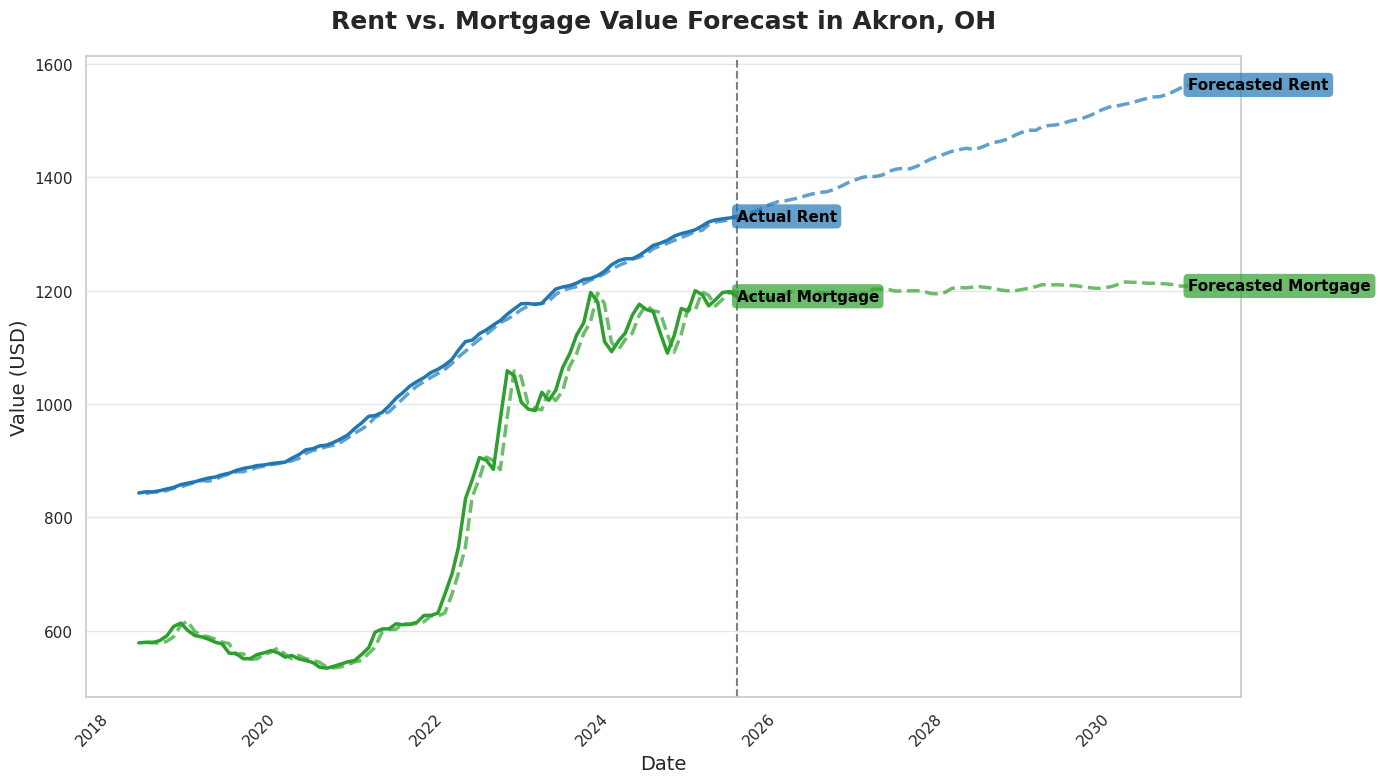

In [49]:
sns.set_theme(style="whitegrid")

# --- Data Preparation ---
metro = 'Akron, OH'

# Assuming 'df' and 'forecast' are available DataFrames
df_metro = df[df['RegionName'] == metro].copy()
forecast_metro = forecast[forecast['RegionName'] == metro].copy()
forecast_start_date = df_metro['Date'].iloc[-1]

# --- Define Line Colors and Labels ---
COLORS = {
    'Rent': '#1f77b4',  # Blue
    'Mortgage': '#2ca02c' # Green
}

# --- Create Connectors for Smooth Transition (as discussed previously) ---
# This ensures the forecast line starts exactly where the actual line ends, filling the gap.

# Rent Series Connector
last_actual_rent_point = df_metro.iloc[-1][['Date', 'RentValue']].rename({'RentValue': 'Value'})
first_forecast_rent_point = forecast_metro.iloc[[0]][['Date', 'ForecastedRentValue']].rename({'ForecastedRentValue': 'Value'})

# Mortgage Series Connector
last_actual_mortgage_point = df_metro.iloc[-1][['Date', 'MortgageValue']].rename({'MortgageValue': 'Value'})
first_forecast_mortgage_point = forecast_metro.iloc[[0]][['Date', 'ForecastedMortgageValue']].rename({'ForecastedMortgageValue': 'Value'})

# Create the connector DataFrames by concatenating the Series and ensuring the 'Value' column exists
rent_connector_df = pd.concat([last_actual_rent_point.to_frame().T, first_forecast_rent_point], ignore_index=True)
mortgage_connector_df = pd.concat([last_actual_mortgage_point.to_frame().T, first_forecast_mortgage_point], ignore_index=True)


# --- Plotting ---
plt.figure(figsize=(14, 8))
ax = plt.gca() # Get the current axes

# --- 1. Plot Actual Data (Solid Lines) ---
actual_rent_line, = ax.plot(df_metro['Date'], df_metro['RentValue'],
                            color=COLORS['Rent'],
                            linewidth=2.5,
                            zorder=2) # zorder to ensure it's on top
actual_mortgage_line, = ax.plot(df_metro['Date'], df_metro['MortgageValue'],
                                color=COLORS['Mortgage'],
                                linewidth=2.5,
                                zorder=2)

# --- 2. Plot Forecast Data (Dashed/Lighter Lines) ---

# Connect Rent lines
ax.plot(rent_connector_df['Date'], rent_connector_df['Value'],
        color=COLORS['Rent'], linestyle='--', linewidth=2.5, alpha=0.7)

# Plot the rest of the Rent Forecast
forecast_rent_line, = ax.plot(forecast_metro['Date'], forecast_metro['ForecastedRentValue'],
                              color=COLORS['Rent'],
                              linestyle='--',
                              alpha=0.7,
                              linewidth=2.5,
                              zorder=1) # zorder to keep it subtle

# Connect Mortgage lines
ax.plot(mortgage_connector_df['Date'], mortgage_connector_df['Value'],
        color=COLORS['Mortgage'], linestyle='--', linewidth=2.5, alpha=0.7)

# Plot the rest of the Mortgage Forecast
forecast_mortgage_line, = ax.plot(forecast_metro['Date'], forecast_metro['ForecastedMortgageValue'],
                                  color=COLORS['Mortgage'],
                                  linestyle='--',
                                  alpha=0.7,
                                  linewidth=2.5,
                                  zorder=1)
ax.axvline(x=forecast_start_date,
           color='gray',
           linestyle='--',
           linewidth=1.5,
           label='Forecast Starts')

# --- 3. Add Inline Labels at the End of the Forecast ---

# Helper function to add the text label
def add_inline_label(x_coord, y_coord, text, color):
    ax.text(x_coord, y_coord, text,
            color='black',
            backgroundcolor='white',
            fontsize=11,
            fontweight='bold',
            verticalalignment='center',
            horizontalalignment='left',
            bbox=dict(facecolor=color, alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))

# Rent Label
add_inline_label(forecast_metro['Date'].iloc[-1], forecast_metro['ForecastedRentValue'].iloc[-1],
                 'Forecasted Rent', COLORS['Rent'])
# Mortgage Label
add_inline_label(forecast_metro['Date'].iloc[-1], forecast_metro['ForecastedMortgageValue'].iloc[-1],
                 'Forecasted Mortgage', COLORS['Mortgage'])

# Label Actual Rent at its end point (before the forecast starts)
add_inline_label(df_metro['Date'].iloc[-1], df_metro['RentValue'].iloc[-1],
                 'Actual Rent', COLORS['Rent'])

# Label Actual Mortgage at its end point
add_inline_label(df_metro['Date'].iloc[-1], df_metro['MortgageValue'].iloc[-1],
                 'Actual Mortgage', COLORS['Mortgage'])


# --- 4. Final Styling ---
ax.set_title(f"Rent vs. Mortgage Value Forecast in {metro}",
             fontsize=18,
             fontweight='bold',
             pad=20)

ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Value (USD)", fontsize=14)

# Improve grid: only show horizontal lines for easier reading of values
ax.grid(axis='y', linestyle='-', alpha=0.5)
ax.grid(axis='x', visible=False)

# Rotate and format X-axis labels for readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

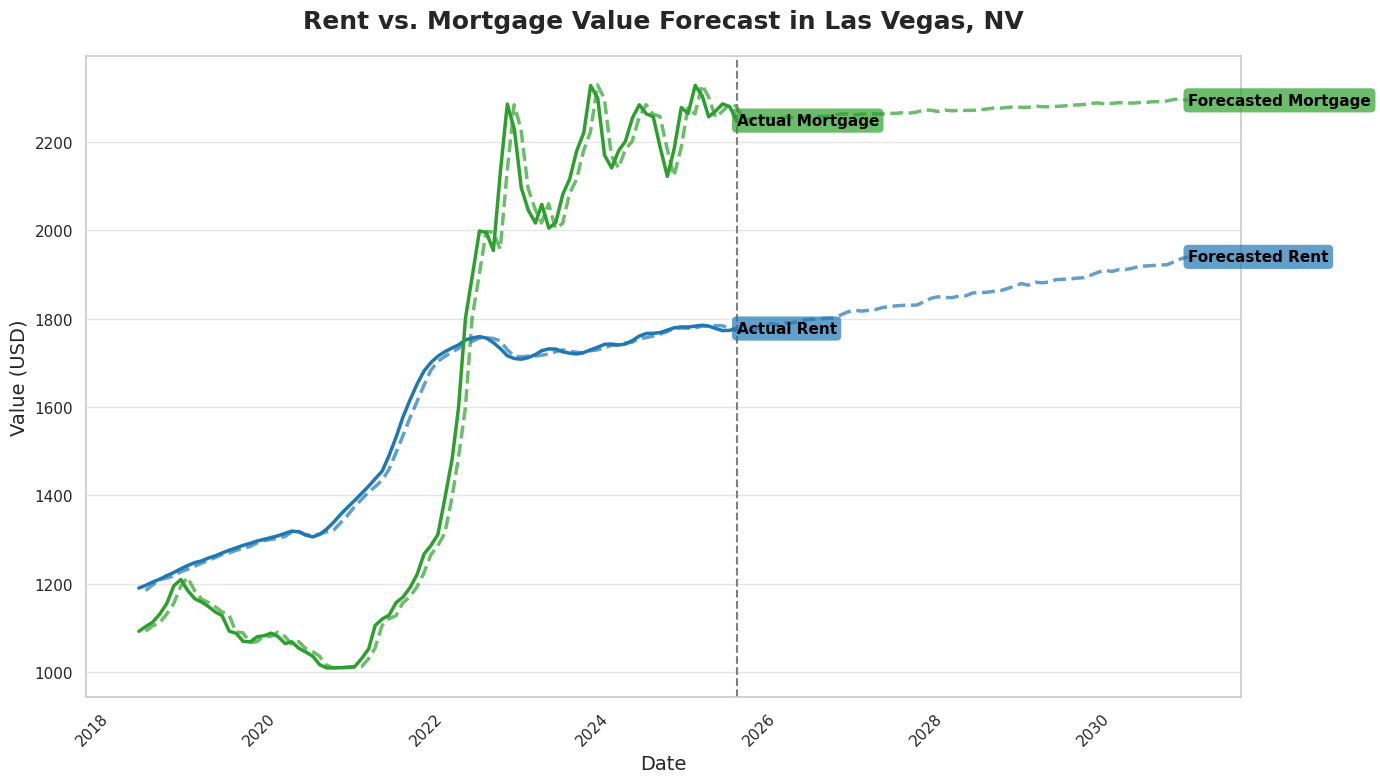

In [50]:
sns.set_theme(style="whitegrid")

# --- Data Preparation ---
metro = 'Las Vegas, NV'

# Assuming 'df' and 'forecast' are available DataFrames
df_metro = df[df['RegionName'] == metro].copy()
forecast_metro = forecast[forecast['RegionName'] == metro].copy()
forecast_start_date = df_metro['Date'].iloc[-1]


# --- Define Line Colors and Labels ---
COLORS = {
    'Rent': '#1f77b4',  # Blue
    'Mortgage': '#2ca02c' # Green
}

# --- Create Connectors for Smooth Transition (as discussed previously) ---
# This ensures the forecast line starts exactly where the actual line ends, filling the gap.

# Rent Series Connector
last_actual_rent_point = df_metro.iloc[-1][['Date', 'RentValue']].rename({'RentValue': 'Value'})
first_forecast_rent_point = forecast_metro.iloc[[0]][['Date', 'ForecastedRentValue']].rename({'ForecastedRentValue': 'Value'})

# Mortgage Series Connector
last_actual_mortgage_point = df_metro.iloc[-1][['Date', 'MortgageValue']].rename({'MortgageValue': 'Value'})
first_forecast_mortgage_point = forecast_metro.iloc[[0]][['Date', 'ForecastedMortgageValue']].rename({'ForecastedMortgageValue': 'Value'})

# Create the connector DataFrames by concatenating the Series and ensuring the 'Value' column exists
rent_connector_df = pd.concat([last_actual_rent_point.to_frame().T, first_forecast_rent_point], ignore_index=True)
mortgage_connector_df = pd.concat([last_actual_mortgage_point.to_frame().T, first_forecast_mortgage_point], ignore_index=True)


# --- Plotting ---
plt.figure(figsize=(14, 8))
ax = plt.gca() # Get the current axes

# --- 1. Plot Actual Data (Solid Lines) ---
actual_rent_line, = ax.plot(df_metro['Date'], df_metro['RentValue'],
                            color=COLORS['Rent'],
                            linewidth=2.5,
                            zorder=2) # zorder to ensure it's on top
actual_mortgage_line, = ax.plot(df_metro['Date'], df_metro['MortgageValue'],
                                color=COLORS['Mortgage'],
                                linewidth=2.5,
                                zorder=2)

# --- 2. Plot Forecast Data (Dashed/Lighter Lines) ---

# Connect Rent lines
ax.plot(rent_connector_df['Date'], rent_connector_df['Value'],
        color=COLORS['Rent'], linestyle='--', linewidth=2.5, alpha=0.7)

# Plot the rest of the Rent Forecast
forecast_rent_line, = ax.plot(forecast_metro['Date'], forecast_metro['ForecastedRentValue'],
                              color=COLORS['Rent'],
                              linestyle='--',
                              alpha=0.7,
                              linewidth=2.5,
                              zorder=1) # zorder to keep it subtle

# Connect Mortgage lines
ax.plot(mortgage_connector_df['Date'], mortgage_connector_df['Value'],
        color=COLORS['Mortgage'], linestyle='--', linewidth=2.5, alpha=0.7)

# Plot the rest of the Mortgage Forecast
forecast_mortgage_line, = ax.plot(forecast_metro['Date'], forecast_metro['ForecastedMortgageValue'],
                                  color=COLORS['Mortgage'],
                                  linestyle='--',
                                  alpha=0.7,
                                  linewidth=2.5,
                                  zorder=1)
# 🌟 ADD THE VERTICAL LINE TO MARK THE FORECAST START
ax.axvline(x=forecast_start_date,
           color='gray',
           linestyle='--',
           linewidth=1.5,
           label='Forecast Starts')

add_inline_label(forecast_metro['Date'].iloc[-1], forecast_metro['ForecastedRentValue'].iloc[-1],
                 'Forecasted Rent', COLORS['Rent'])
# Mortgage Label
add_inline_label(forecast_metro['Date'].iloc[-1], forecast_metro['ForecastedMortgageValue'].iloc[-1],
                 'Forecasted Mortgage', COLORS['Mortgage'])

# Label Actual Rent at its end point (before the forecast starts)
add_inline_label(df_metro['Date'].iloc[-1], df_metro['RentValue'].iloc[-1],
                 'Actual Rent', COLORS['Rent'])

# Label Actual Mortgage at its end point
add_inline_label(df_metro['Date'].iloc[-1], df_metro['MortgageValue'].iloc[-1],
                 'Actual Mortgage', COLORS['Mortgage'])


# --- 4. Final Styling ---
ax.set_title(f"Rent vs. Mortgage Value Forecast in {metro}",
             fontsize=18,
             fontweight='bold',
             pad=20)

ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Value (USD)", fontsize=14)

# Improve grid: only show horizontal lines for easier reading of values
ax.grid(axis='y', linestyle='-', alpha=0.5)
ax.grid(axis='x', visible=False)

# Rotate and format X-axis labels for readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

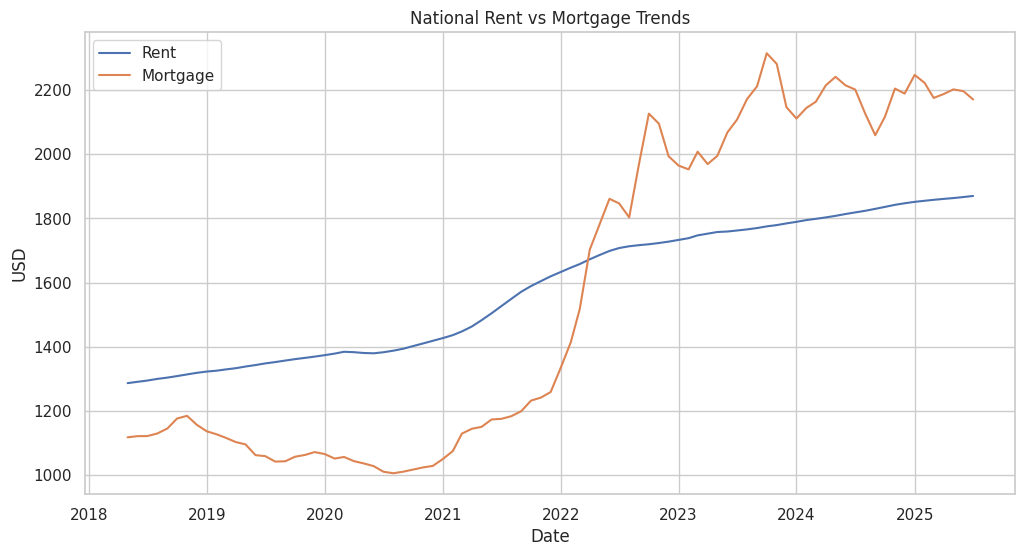

In [37]:
national = df.groupby('Date')[['RentValue','MortgageValue']].mean().reset_index()

plt.figure(figsize=(12,6))
plt.plot(national['Date'], national['RentValue'], label='Rent')
plt.plot(national['Date'], national['MortgageValue'], label='Mortgage')
plt.title("National Rent vs Mortgage Trends")
plt.xlabel("Date")
plt.ylabel("USD")
plt.legend()
plt.show()

/tmp/ipython-input-765366317.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


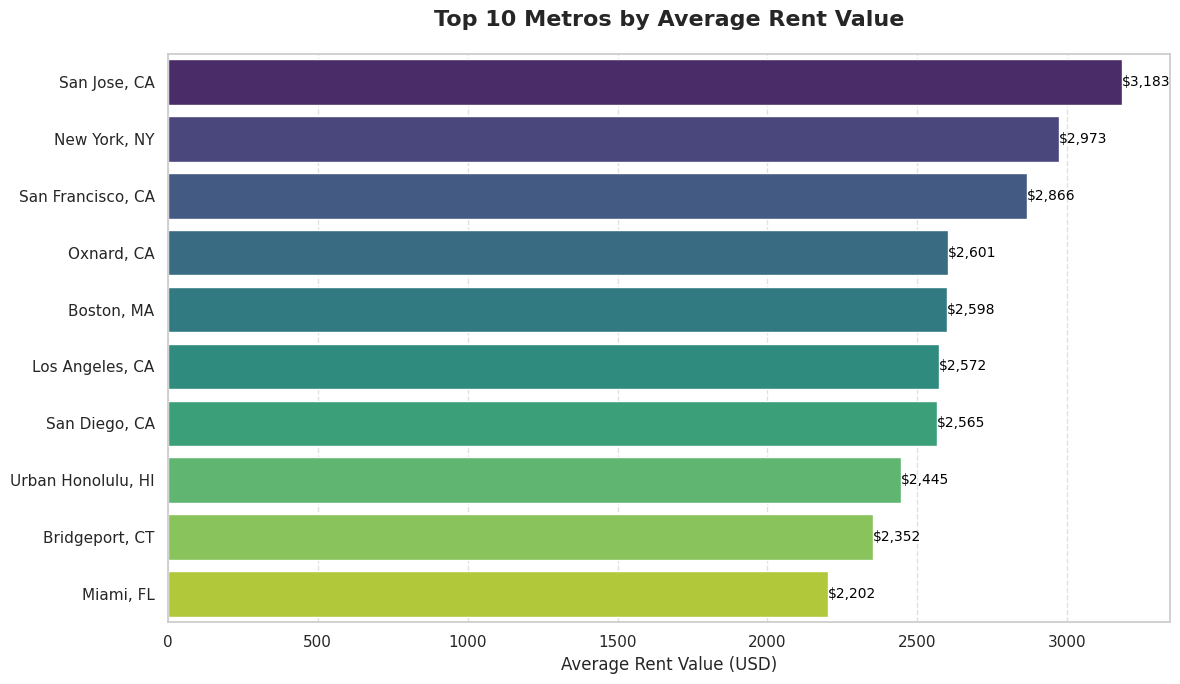

In [39]:
df_top_metros_data = df.groupby('RegionName')['RentValue'].mean().sort_values(ascending=False).head(10).reset_index()
df_top_metros_data.columns = ['Metro Area', 'Average Rent Value'] # Rename columns for clarity

# 2. Set up the plot aesthetics
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

# 3. Create the horizontal bar chart
# 'Metro Area' goes on the y-axis, 'Average Rent Value' on the x-axis
ax = sns.barplot(
    x='Average Rent Value',
    y='Metro Area',
    data=df_top_metros_data,
    palette="viridis" # A modern, attractive color palette
)

# 4. Add data labels to the bars
for index, row in df_top_metros_data.iterrows():
    # Place text slightly to the right of the bar end
    ax.text(row['Average Rent Value'], index, f"${row['Average Rent Value']:,.0f}",
             color='black', ha="left", va="center", fontsize=10)

# 5. Final Styling
plt.title("Top 10 Metros by Average Rent Value", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Average Rent Value (USD)", fontsize=12)
plt.ylabel("") # Remove y-axis label for cleaner look, as bar labels are sufficient
plt.grid(axis='x', linestyle='--', alpha=0.6) # Keep a light grid on the x-axis
plt.grid(axis='y', visible=False) # Remove vertical lines to emphasize horizontal comparison

plt.tight_layout()
plt.savefig('top_10_metros_horizontal_bar_chart.png')
plt.show()

/tmp/ipython-input-3404720437.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


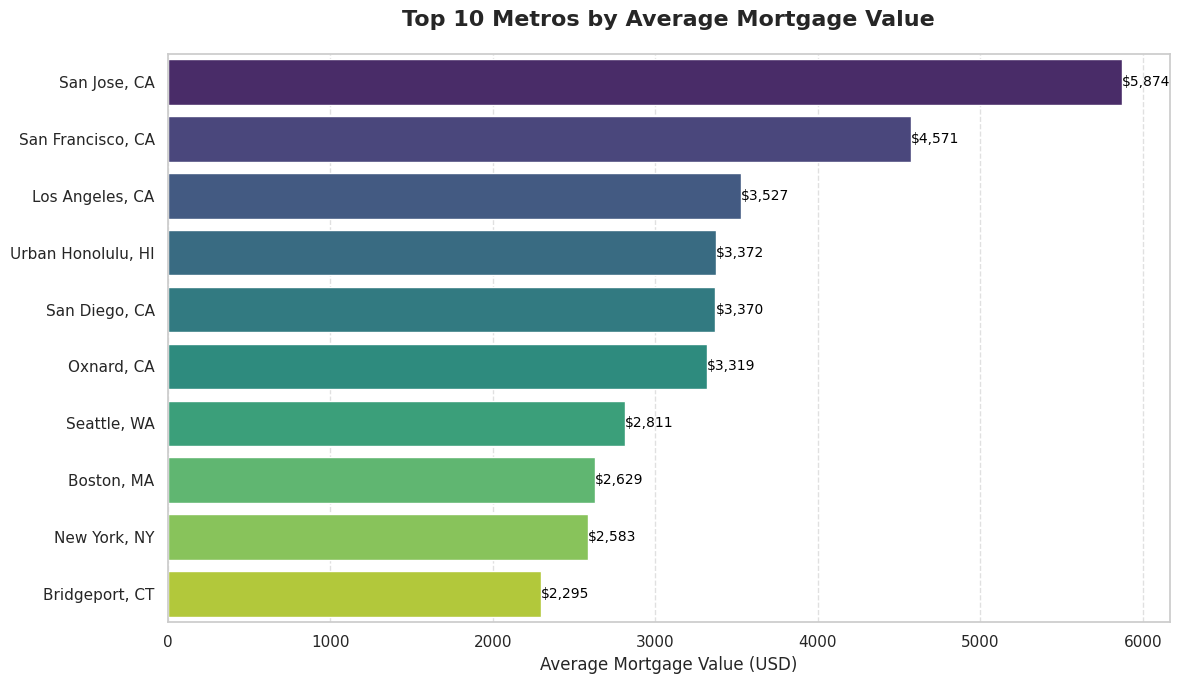

In [41]:
df_top_metros_data = df.groupby('RegionName')['MortgageValue'].mean().sort_values(ascending=False).head(10).reset_index()
df_top_metros_data.columns = ['Metro Area', 'Average Mortgage Value']

# 2. Set up the plot aesthetics
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

# 3. Create the horizontal bar chart
# 'Metro Area' goes on the y-axis, 'Average Rent Value' on the x-axis
ax = sns.barplot(
    x='Average Mortgage Value',
    y='Metro Area',
    data=df_top_metros_data,
    palette="viridis" # A modern, attractive color palette
)

# 4. Add data labels to the bars
for index, row in df_top_metros_data.iterrows():
    # Place text slightly to the right of the bar end
    ax.text(row['Average Mortgage Value'], index, f"${row['Average Mortgage Value']:,.0f}",
             color='black', ha="left", va="center", fontsize=10)

# 5. Final Styling
plt.title("Top 10 Metros by Average Mortgage Value", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Average Mortgage Value (USD)", fontsize=12)
plt.ylabel("") # Remove y-axis label for cleaner look, as bar labels are sufficient
plt.grid(axis='x', linestyle='--', alpha=0.6) # Keep a light grid on the x-axis
plt.grid(axis='y', visible=False) # Remove vertical lines to emphasize horizontal comparison

plt.tight_layout()
plt.savefig('top_10_metros_horizontal_bar_chart.png')
plt.show()

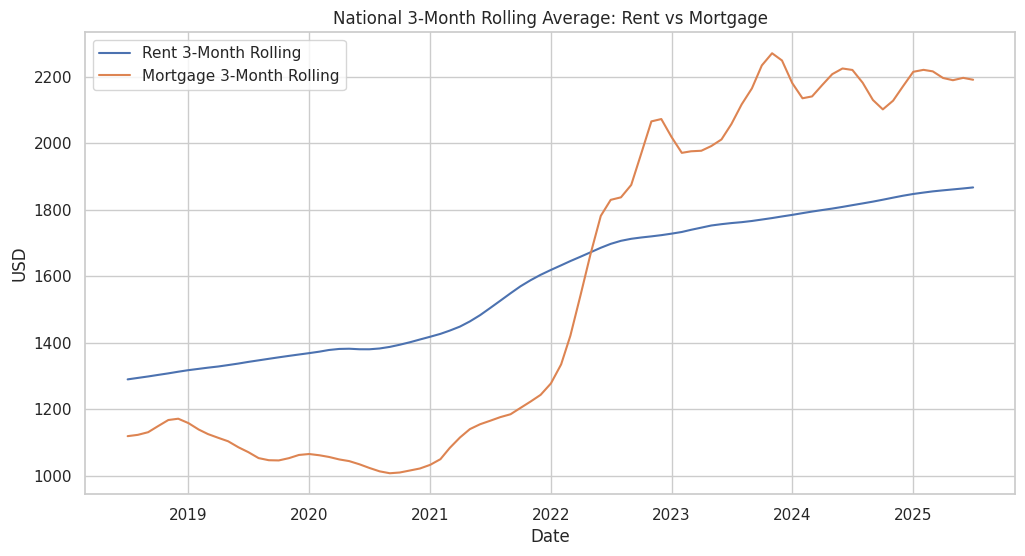

In [40]:
df['Rent_roll3'] = df.groupby('RegionName')['RentValue'].transform(lambda x: x.rolling(3).mean())
df['Mortgage_roll3'] = df.groupby('RegionName')['MortgageValue'].transform(lambda x: x.rolling(3).mean())

plt.figure(figsize=(12,6))
plt.plot(national['Date'], df.groupby('Date')['Rent_roll3'].mean(), label='Rent 3-Month Rolling')
plt.plot(national['Date'], df.groupby('Date')['Mortgage_roll3'].mean(), label='Mortgage 3-Month Rolling')
plt.title("National 3-Month Rolling Average: Rent vs Mortgage")
plt.xlabel("Date")
plt.ylabel("USD")
plt.legend()
plt.show()

In [43]:
df_state = df.groupby('StateName')['Rent_to_Mortgage_Ratio'].mean().reset_index()

# Choropleth Map
fig = px.choropleth(df_state,
                    locations='StateName',
                    locationmode="USA-states",
                    color='Rent_to_Mortgage_Ratio',
                    color_continuous_scale=['red','white','green'],
                    scope="usa",
                    labels={'Rent_to_Mortgage_Ratio':'Buy-Rent Index'})
fig.update_layout(title_text='Buy vs Rent Favorability by State')
fig.show()

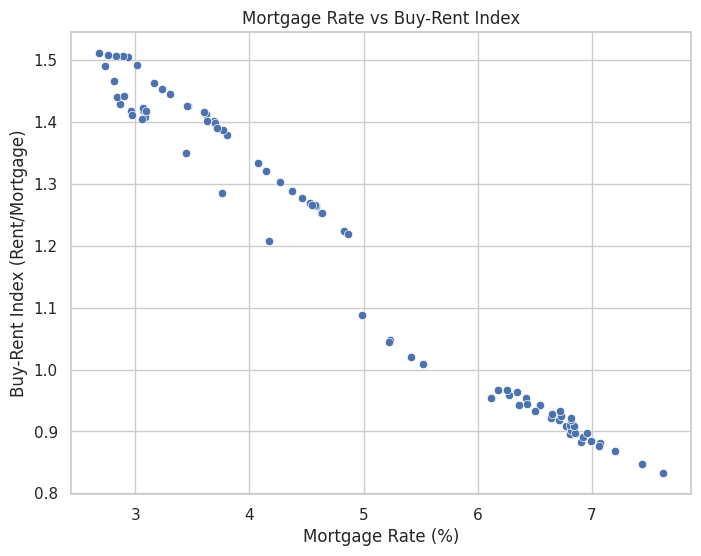

In [44]:
df_corr = df.groupby('Date')[['mortgage_rate','Rent_to_Mortgage_Ratio']].mean().reset_index()
plt.figure(figsize=(8,6))
sns.scatterplot(x='mortgage_rate', y='Rent_to_Mortgage_Ratio', data=df_corr)
plt.title("Mortgage Rate vs Buy-Rent Index")
plt.xlabel("Mortgage Rate (%)")
plt.ylabel("Buy-Rent Index (Rent/Mortgage)")
plt.show()

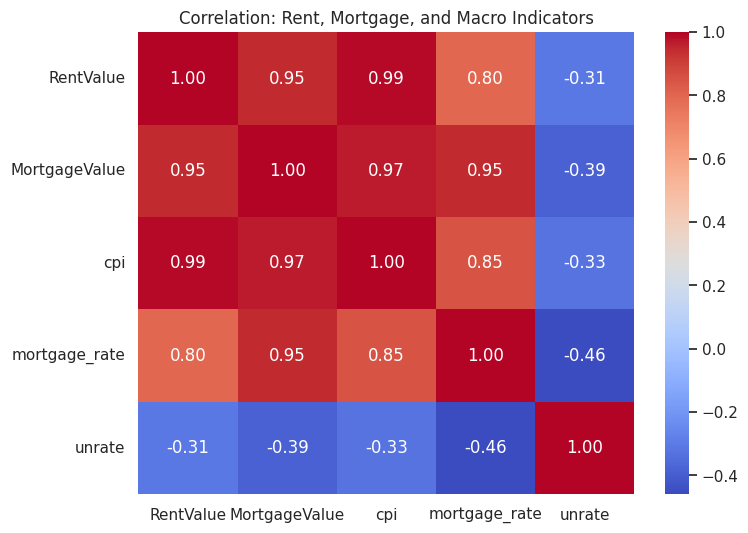

In [46]:
macro_cols = ['cpi','mortgage_rate','unrate']
df_macro = df.groupby('Date')[['RentValue','MortgageValue']+macro_cols].mean().reset_index()

# Macro Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_macro[['RentValue','MortgageValue','cpi','mortgage_rate','unrate']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation: Rent, Mortgage, and Macro Indicators")
plt.show()